# Group 3 - Assigment 3

In [1]:
import pandas as pd
import numpy as np
import nxviz as nv
import networkx as nx
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS  # used to generate world cloud
import matplotlib.pyplot as plt
import time

### Loading the data

In [2]:
%%time
startTime = time.time()
# data = pd.read_csv("data/soc-redditHyperlinks-body.tsv", sep='\t')
data = pd.read_csv("data/soc-redditHyperlinks-title.tsv", sep='\t')
data.head()

Wall time: 3.96 s


,SOURCE_SUBREDDIT,TARGET_SUBREDDIT,POST_ID,TIMESTAMP,LINK_SENTIMENT,PROPERTIES
0,rddtgaming,rddtrust,1u4pzzs,2013-12-31 16:39:18,1,"25.0,23.0,0.76,0.0,0.44,0.12,0.12,4.0,4.0,0.0,..."
1,xboxone,battlefield_4,1u4tmfs,2013-12-31 17:59:11,1,"100.0,88.0,0.78,0.02,0.08,0.13,0.07,16.0,16.0,..."
2,ps4,battlefield_4,1u4tmos,2013-12-31 17:59:40,1,"100.0,88.0,0.78,0.02,0.08,0.13,0.07,16.0,16.0,..."
3,fitnesscirclejerk,leangains,1u50xfs,2013-12-31 19:01:56,1,"49.0,43.0,0.775510204082,0.0,0.265306122449,0...."
4,fitnesscirclejerk,lifeprotips,1u51nps,2013-12-31 21:02:28,1,"14.0,14.0,0.785714285714,0.0,0.428571428571,0...."


In [3]:
data.shape

(571927, 6)

In [4]:
data.columns

Index(['SOURCE_SUBREDDIT', 'TARGET_SUBREDDIT', 'POST_ID', 'TIMESTAMP',
       'LINK_SENTIMENT', 'PROPERTIES'],
      dtype='object')

In [5]:
data.dtypes

SOURCE_SUBREDDIT    object
TARGET_SUBREDDIT    object
POST_ID             object
TIMESTAMP           object
LINK_SENTIMENT       int64
PROPERTIES          object
dtype: object

In [6]:
data['TIMESTAMP'] = pd.to_datetime(data['TIMESTAMP'], format="%Y-%m-%d %H:%M:%S")
data.head()

,SOURCE_SUBREDDIT,TARGET_SUBREDDIT,POST_ID,TIMESTAMP,LINK_SENTIMENT,PROPERTIES
0,rddtgaming,rddtrust,1u4pzzs,2013-12-31 16:39:18,1,"25.0,23.0,0.76,0.0,0.44,0.12,0.12,4.0,4.0,0.0,..."
1,xboxone,battlefield_4,1u4tmfs,2013-12-31 17:59:11,1,"100.0,88.0,0.78,0.02,0.08,0.13,0.07,16.0,16.0,..."
2,ps4,battlefield_4,1u4tmos,2013-12-31 17:59:40,1,"100.0,88.0,0.78,0.02,0.08,0.13,0.07,16.0,16.0,..."
3,fitnesscirclejerk,leangains,1u50xfs,2013-12-31 19:01:56,1,"49.0,43.0,0.775510204082,0.0,0.265306122449,0...."
4,fitnesscirclejerk,lifeprotips,1u51nps,2013-12-31 21:02:28,1,"14.0,14.0,0.785714285714,0.0,0.428571428571,0...."


### Data Cleaning

In [7]:
data.isnull().any()

SOURCE_SUBREDDIT    False
TARGET_SUBREDDIT    False
POST_ID             False
TIMESTAMP           False
LINK_SENTIMENT      False
PROPERTIES          False
dtype: bool

- there is no null value in the dataset

### Top 50 source subreddit

In [8]:
top50Source = data.groupby('SOURCE_SUBREDDIT')['POST_ID'].count().reset_index(name='count').sort_values(by='count',ascending=False).head(50)
top50Source.head()

,SOURCE_SUBREDDIT,count
36057,subredditdrama,22971
4094,bestof,21170
38764,titlegore,9500
33535,shitredditsays,7338
33506,shitpost,6657


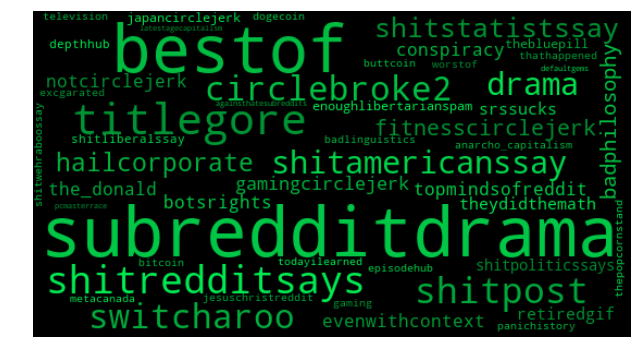

In [9]:
# Function that control the color of the words
def random_color_func(word=None, font_size=None, position=None,
                      orientation=None, font_path=None, random_state=None):
    tone = 100 # define the color of the words
    h = int(360.0 * tone / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(70, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)


topSource = top50Source.set_index('SOURCE_SUBREDDIT')['count'].to_dict()
f, ax = plt.subplots(figsize=(15, 6))
wordcloud = WordCloud(width=550, height=300, background_color='black', 
                      max_words=50, relative_scaling=0.6,
                      color_func = random_color_func,
                      normalize_plurals=True)
wordcloud.generate_from_frequencies(topSource)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

### Top 50 target subreddit

In [10]:
top50Target = data.groupby('TARGET_SUBREDDIT')['POST_ID'].count().reset_index(name='count').sort_values(by='count',ascending=False).head(50)
top50Target.head()

,TARGET_SUBREDDIT,count
1635,askreddit,19293
17872,pics,9799
11293,iama,9752
24159,todayilearned,8753
9232,funny,8731


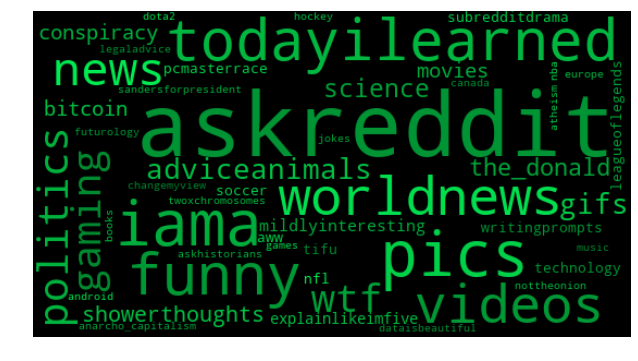

In [11]:
topTarget = top50Target.set_index('TARGET_SUBREDDIT')['count'].to_dict()
f, ax = plt.subplots(figsize=(15, 6))
wordcloud = WordCloud(width=550, height=300, background_color='Black', 
                      max_words=50, relative_scaling=0.6,
                      color_func = random_color_func,
                      normalize_plurals=True)
wordcloud.generate_from_frequencies(topTarget)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

#### How many unique source and target subreddit?

In [12]:
uniqueSource = data['SOURCE_SUBREDDIT'].unique()
uniqueSource.size

43695

In [13]:
uniqueTarget = data['TARGET_SUBREDDIT'].unique()
uniqueTarget.size

26888

#### How many different POST_ID exists?

In [14]:
data.shape

(571927, 6)

In [15]:
uniquePost = data['POST_ID'].unique()
uniquePost.size

571922

In [16]:
post = data.groupby('POST_ID')['LINK_SENTIMENT'].count().reset_index(name='count').sort_values(by='count', ascending=False)
print(post.shape)
post.head()

(571922, 2)


,POST_ID,count
184974,35ff4ss,2
340536,4adtxws,2
265099,3oz3jos,2
110203,2m4lpis,2
258385,3na5zus,2


In [17]:
postId = data[data.POST_ID=="4asjoos"]
postId.head()

,SOURCE_SUBREDDIT,TARGET_SUBREDDIT,POST_ID,TIMESTAMP,LINK_SENTIMENT,PROPERTIES


- As we can see there are multiple target for the same post

### What is the percentage of negative link sentiment?

Source to positve target:  (510787, 6)
Source to negative target:  (61140, 6)
Negative % =  10.690175494424988


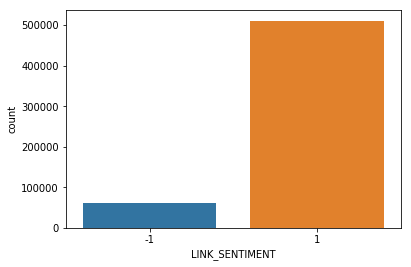

In [18]:
posLinkSentiments = data[data.LINK_SENTIMENT == 1]
negLinkSentiments = data[data.LINK_SENTIMENT == -1]
print("Source to positve target: ", posLinkSentiments.shape)
print("Source to negative target: ", negLinkSentiments.shape)
print("Negative % = ", negLinkSentiments.shape[0]*100/(posLinkSentiments.shape[0] + negLinkSentiments.shape[0]))
sns.countplot(x='LINK_SENTIMENT', data=data)

### Show the top target for postive and negative sentiments

In [19]:
topPosTarget = posLinkSentiments.groupby('TARGET_SUBREDDIT')['POST_ID'].count().reset_index(name='count').sort_values(by='count', ascending=False)
topPosTarget.head()

,TARGET_SUBREDDIT,count
1613,askreddit,16819
11085,iama,9231
17553,pics,8688
9064,funny,7713
23726,todayilearned,7706


In [20]:
topNegTarget = negLinkSentiments.groupby('TARGET_SUBREDDIT')['POST_ID'].count().reset_index(name='count').sort_values(by='count', ascending=False)
topNegTarget.head()

,TARGET_SUBREDDIT,count
307,askreddit,2474
4908,worldnews,1314
2978,news,1234
3311,pics,1111
4470,todayilearned,1047


### How many unique source and target subreddit exists where link sentiments is positive?

In [21]:
uniqueSourceTarget = posLinkSentiments.groupby(['SOURCE_SUBREDDIT','TARGET_SUBREDDIT'])['POST_ID'].count().reset_index(name='count').sort_values(by='count', ascending=False)
print(uniqueSourceTarget.shape)
uniqueSourceTarget.head()

(221593, 3)


,SOURCE_SUBREDDIT,TARGET_SUBREDDIT,count
123292,moronicmondayandroid,android,478
83782,goodshibe,dogecoin,299
130089,nightlypick,hockey,295
198028,titlegore,todayilearned,279
185548,switcharoo,pics,245


- as we can see, out of 265k rows(positive sentiment), only 130k rows has unique source and target subreddit

### Convert the data into graph model 
- vertex: subreddits
- edge: source and target subreddits, if they have positve link_sentiment
- Adjacency list

In [22]:
# first give each subreddits an index value
subreddits = np.concatenate((uniqueSource, uniqueTarget), axis=0)
subreddits = np.unique(subreddits)
# subreddits = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
subreddits_dict = {val : idx for idx, val in enumerate(subreddits)}
rsubreddits_dict = {val : key for key, val in subreddits_dict.items()}

In [23]:
# implementation of an undirected graph using Adjacency Lists
class Vertex:
    def __init__(self, name):
        self.name = name
        self.neighbors = list()
    
    def add_neighbor(self, v):
        if v not in self.neighbors:
            self.neighbors.append(v)

class Graph:
    def __init__(self):
        self.vertices = {}
    
    def add_vertex(self, vertex):
        if isinstance(vertex, Vertex) and vertex.name not in self.vertices:
            self.vertices[vertex.name] = vertex
            return True
        else:
            return False
    
    def add_edge(self, u, v):
        if u in self.vertices and v not in self.vertices[u].neighbors: # removing duplicate edges
            self.vertices[u].add_neighbor(v)
            return True
        else:
            return False
    
    def sort_neighbors(self):
        for x in self.vertices:
            self.vertices[x].neighbors.sort()
            
    def print_graph(self):
        for key in self.vertices.keys():
            print(str(key) + str(self.vertices[key].neighbors))

In [24]:
g = Graph() # for storing the original graph: source=>target
gt = Graph() # for storing the reverse graph: target=>source
gsm = Graph() # for storing all the edges(undirected): source=>target, target=>source
n = len(subreddits_dict.keys()) # number of nodes

# first add all the vertex in the vertices dictionary
for key, value in subreddits_dict.items():
    g.add_vertex(Vertex(value))
    gt.add_vertex(Vertex(value))
    gsm.add_vertex(Vertex(value))

# now add the edges to the graph
graph_data = posLinkSentiments[['SOURCE_SUBREDDIT','TARGET_SUBREDDIT']].values.tolist()
# graph_data = [[0,1],[1,2],[2,3],[2,0],[2,5],[5,6],[5,7],[6,8],[6,4],[8,9],[9,6],[10,11]]
# graph_data = [[0,1],[1,2],[2,3],[3,4],[4,0],[0,2],[1,3],[1,4]]

m = 0 # number of edges
for row in graph_data:
    x = subreddits_dict[row[0]]
    y = subreddits_dict[row[1]]
    m += g.add_edge(x, y)
    gt.add_edge(y, x)
    if x < y:
        gsm.add_edge(x, y)
    else:
        gsm.add_edge(y, x)

# sort the neighbors of each vertex
g.sort_neighbors()
# g.print_graph()

print("number of nodes:", n)
print("number of edges:", m)

number of nodes: 54075
number of edges: 221593


In [25]:
gt.sort_neighbors()
# gt.print_graph()

### Find clustering coefficient(global/local)
- Sort-Merge algorithm to find triangles and triads

In [26]:
gsm.sort_neighbors()
# gsm.print_graph()

In [27]:
%%time
triangles = []
triads = []
def find_triangles():
    visited_ids = set() # remember the nodes that we have tested already
    for node_a_id in g.vertices.keys():
        for node_b_id in g.vertices[node_a_id].neighbors:
            if node_b_id in visited_ids:
                continue # we should have already found b->a->??->b
            for node_c_id in g.vertices[node_b_id].neighbors:
                if node_c_id in visited_ids:
                    continue # we should have already found c->a->b->c
                if node_a_id in g.vertices[node_c_id].neighbors:
                    triangles.append([node_a_id, node_b_id, node_c_id])
        visited_ids.add(node_a_id) # don't search a - we already have all those cycles
        
def sort_merge():
    for u in gsm.vertices.keys():
        ulen = len(gsm.vertices[u].neighbors)
        for i in range(ulen):
            v = gsm.vertices[u].neighbors[i]
            if u > v:
                continue
            vlen = len(gsm.vertices[v].neighbors)
            up = i + 1
            down = 0
            while up < ulen or down < vlen:
                if down < vlen and gsm.vertices[v].neighbors[down] <= v:
                    down += 1
                    continue
                if up == ulen:
                    triads.append([u, v, gsm.vertices[v].neighbors[down]])
                    down += 1
                elif down == vlen:
                    triads.append([u, v, gsm.vertices[u].neighbors[up]])
                    up += 1
                elif gsm.vertices[u].neighbors[up] == gsm.vertices[v].neighbors[down]:
                    triangles.append([u, v, gsm.vertices[u].neighbors[up]])
                    up += 1
                    down += 1
                elif gsm.vertices[u].neighbors[up] > gsm.vertices[v].neighbors[down]:
                    triads.append([u, v, gsm.vertices[v].neighbors[down]])
                    down += 1
                else:
                    triads.append([u, v, gsm.vertices[u].neighbors[up]])
                    up += 1
                    
        
# find_triangles() # O(n^3)
# sort_merge()
print("number of triangles:", len(triangles))
print("number of triads:", len(triads)) # there are some left-overs, same as lecture slide
# print(triangles)
# print(triads)

number of triangles: 0
number of triads: 0
Wall time: 0 ns


### Find strongly connected components (similar subreddit)
- When there is a loop among all the nodes in a component
- Show the subreddits of same cluster

In [28]:
top_list = [] # topologically sorted nodes
scc = [] # strongly connected component
cc = [] # connected component
visited = [False] * n
scc_idx = 0
cc_idx = 0

In [29]:
import sys
sys.setrecursionlimit(10000)
def dfs(x): # normal dfs
    cc[cc_idx].append(x)
    visited[x] = True
    for y in g.vertices[x].neighbors:
        if not visited[y]:
            dfs(y)
    top_list.append(x) # topological sort
    
def rdfs(x): # reverse dfs to find the strongly connected components
    scc[scc_idx].append(x)
    visited[x] = False
    for y in gt.vertices[x].neighbors:
        if visited[y]:
            rdfs(y)

In [30]:
for x in range(0, n, 1):
    if not visited[x]:
        cc.append([])
        dfs(x)
        cc_idx += 1

for i in range(n-1, -1, -1):
    x = top_list[i]
    if visited[x]:
        scc.append([])
        rdfs(x)
        scc_idx += 1

cc = sorted(cc, key = lambda element : len(element), reverse = True)
print("total connected component:", cc_idx)
# print(cc)
scc = sorted(scc, key = lambda element : len(element), reverse = True)
print("total strongly connected component:", scc_idx)
# print(scc)

total connected component: 29080
total strongly connected component: 39923


#### Show the subreddits of second component

In [31]:
scc_idx = len(scc)
nodeToScc = {} # renaming the nodes, based on their scc index
for i in range(scc_idx):
    for x in scc[i]:
        nodeToScc[x] = i
for x in scc[1]:
    print(rsubreddits_dict[x])

makeavideogame
mavgartists
mavgdesigners
trgmusicians


[['makeavideogame', 'mavgdesigners'], ['mavgartists', 'makeavideogame'], ['mavgartists', 'mavgdesigners'], ['mavgartists', 'trgmusicians'], ['mavgdesigners', 'mavgartists'], ['trgmusicians', 'makeavideogame']]


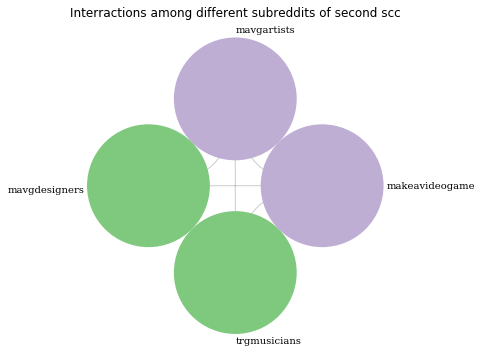

In [32]:
cur_scc = 1
edge_list = []
for x in scc[cur_scc]:
    for y in g.vertices[x].neighbors:
        if y in nodeToScc and nodeToScc[y]==cur_scc:
            edge_list.append([rsubreddits_dict[x], rsubreddits_dict[y]])
print(edge_list)
G = nx.Graph(edge_list)
for n in G.nodes():
    G.nodes[n]['degree'] = len(list(G.neighbors(n)))
c = nv.CircosPlot(G, node_labels=True, node_order='degree', node_color='degree')
# Draw the CircosPlot to the screen
c.draw()
plt.title("Interractions among different subreddits of second scc")
plt.show()

- the subreddits of 2nd cluster

#### print the size of each strongly connected component

In [33]:
for i in range(scc_idx):
    print("scc", i, ": size = ", len(scc[i]))
    if len(scc[i])==1:
        break

scc 0 : size =  13994
scc 1 : size =  4
scc 2 : size =  4
scc 3 : size =  3
scc 4 : size =  3
scc 5 : size =  3
scc 6 : size =  3
scc 7 : size =  3
scc 8 : size =  3
scc 9 : size =  3
scc 10 : size =  3
scc 11 : size =  3
scc 12 : size =  3
scc 13 : size =  3
scc 14 : size =  3
scc 15 : size =  3
scc 16 : size =  3
scc 17 : size =  2
scc 18 : size =  2
scc 19 : size =  2
scc 20 : size =  2
scc 21 : size =  2
scc 22 : size =  2
scc 23 : size =  2
scc 24 : size =  2
scc 25 : size =  2
scc 26 : size =  2
scc 27 : size =  2
scc 28 : size =  2
scc 29 : size =  2
scc 30 : size =  2
scc 31 : size =  2
scc 32 : size =  2
scc 33 : size =  2
scc 34 : size =  2
scc 35 : size =  2
scc 36 : size =  2
scc 37 : size =  2
scc 38 : size =  2
scc 39 : size =  2
scc 40 : size =  2
scc 41 : size =  2
scc 42 : size =  2
scc 43 : size =  2
scc 44 : size =  2
scc 45 : size =  2
scc 46 : size =  2
scc 47 : size =  2
scc 48 : size =  2
scc 49 : size =  2
scc 50 : size =  2
scc 51 : size =  2
scc 52 : size =  2

- as we can see, we have a big cluster of 11k nodes and all the other cluster has less than 10 nodes
- we have only 126 clusters where the size of the cluster greater than 1
- we will only work with these cluster/communities

### Make the aggregated graph (clustered, based on the paper: Visual Analysis of Large Graphs)

In [34]:
significantNodeInScc = {} # to store the most significant node in every cluster/scc
for i in range(scc_idx):
    maxi = -10**9 # negative infinite value
    for x in scc[i]:
        if len(g.vertices[x].neighbors) > maxi:
            maxi = len(g.vertices[x].neighbors)
            significantNodeInScc[i] = rsubreddits_dict[x]
# print(significantNodeInScc)

In [35]:
gScc = Graph()
# now add all the vertex(scc) in the vertices dictionary
for x in range(scc_idx):
    gScc.add_vertex(Vertex(x))
    
scc_edge = 0 # number of edges
# now add the edges to the graph
for i in range(scc_idx):
    for x in scc[i]:
        for y in g.vertices[x].neighbors:
            if y in nodeToScc and nodeToScc[y] != i: # different scc
                scc_edge += gScc.add_edge(i, nodeToScc[y])

# nodes in the aggregated graphs
print("nodes in the aggregated graph:", scc_idx)
print("edges in the aggregated graph:", scc_edge)

# sort the neighbors of each vertex
gScc.sort_neighbors()
# gScc.print_graph()

nodes in the aggregated graph: 39923
edges in the aggregated graph: 44362


- we have converted the 35k node and 286k edge graph into a 24k edge graph by using aggregation/clustering. Also, if we remove the scc component having less than 2 subreddits, the graph will convert to a 127 nodes and 99 edges graph.

#### show the relationship among the cluster, where each component has >=4 degree

In [36]:
min_degree = 4
edge_list = []
for x in gScc.vertices:
    if len(gScc.vertices[x].neighbors) < min_degree:
        continue
    for y in gScc.vertices[x].neighbors:
        if len(gScc.vertices[y].neighbors) < min_degree:
            continue
        edge_list.append([significantNodeInScc[x], significantNodeInScc[y]])
print("total edge of scc graph of degree >= 4:", len(edge_list))

total edge of scc graph of degree >= 4: 499


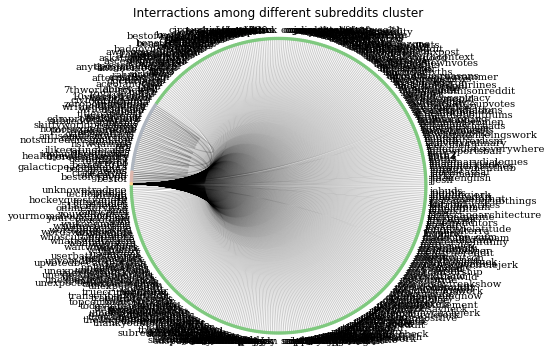

In [37]:
G = nx.Graph(edge_list)
for n in G.nodes():
    G.nodes[n]['degree'] = len(list(G.neighbors(n)))
c = nv.CircosPlot(G, node_labels=True, node_order='degree', node_color='degree')
# Draw the CircosPlot to the screen
c.draw()
plt.title("Interractions among different subreddits cluster")
plt.show()

In [38]:
# remove all the scc where the community has less then 2 subreddits
idx = 0
while idx < scc_idx:
    if len(scc[idx]) == 1:
        break
    idx += 1
scc = scc[:idx]
scc_idx = idx

In [39]:
gScc = nx.Graph()
# now add all the vertex(scc) in the vertices dictionary
for x in range(scc_idx):
    gScc.add_node(significantNodeInScc[x])
    
# now add the edges to the graph
for i in range(scc_idx):
    for x in scc[i]:
        for y in g.vertices[x].neighbors:
            if y in nodeToScc and nodeToScc[y] != i and nodeToScc[y] < scc_idx: # different scc
                gScc.add_edge(significantNodeInScc[i], significantNodeInScc[nodeToScc[y]])
# nodes in the aggregated graphs
print("nodes in the aggregated graph:", scc_idx)
print("edges in the aggregated graph:", len(gScc.edges()))

nodes in the aggregated graph: 142
edges in the aggregated graph: 110


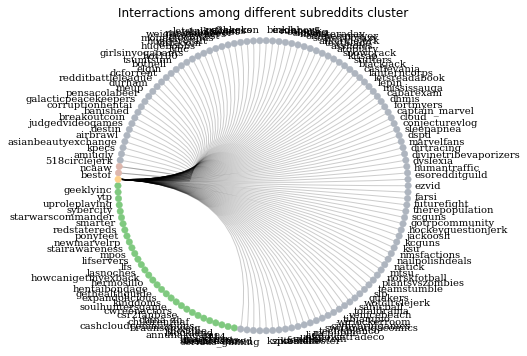

In [40]:
for n in gScc.nodes():
    gScc.nodes[n]['degree'] = len(list(gScc.neighbors(n)))
c = nv.CircosPlot(gScc, node_labels=True, node_order='degree', node_color='degree')
# Draw the CircosPlot to the screen
c.draw()
plt.title("Interractions among different subreddits cluster")
plt.show()

### Finding K-Core
- How sparse the graph is?

### Analysis of subreddit based on time
- When did this subreddit(i.e. askreddit) become popular?

### Is there any relationship between source and target subreddit when the LINK_SENTIMENT is negative?

In [41]:
print("It took %s seconds to process" % (time.time() - startTime))

It took 16.953126668930054 seconds to process
